In [1]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### Preprocess Data

In [8]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='uv_eg_30T', 
    freq=30,
    normalize_time=True
    )

### 30 minutes agg.

In [9]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

### Create, Train, and Perform Inference

Iter 1 , Loss = 0.9788593279330722 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9409568848492156 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9032555965341033 , Noise = 0.5982181429862976
Iter 4 , Loss = 0.8657759355980742 , Noise = 0.5543845295906067
Iter 5 , Loss = 0.828828658093992 , Noise = 0.5129616260528564
Iter 6 , Loss = 0.7930078539000229 , Noise = 0.4739095866680145
Iter 7 , Loss = 0.7583018839908681 , Noise = 0.43718594312667847
Iter 8 , Loss = 0.7237417536619231 , Noise = 0.4027451276779175
Iter 9 , Loss = 0.6885291446598357 , Noise = 0.3705327808856964
Iter 10 , Loss = 0.6531930896059117 , Noise = 0.34048137068748474
Iter 11 , Loss = 0.6191725359193151 , Noise = 0.3125135600566864
Iter 12 , Loss = 0.5881083794527873 , Noise = 0.2865496575832367
Iter 13 , Loss = 0.5609653084001338 , Noise = 0.26251503825187683
Iter 14 , Loss = 0.5369279416192446 , Noise = 0.24034225940704346
Iter 15 , Loss = 0.5140745195170898 , Noise = 0.21996326744556427
Iter 16 , Loss = 0.49107993766

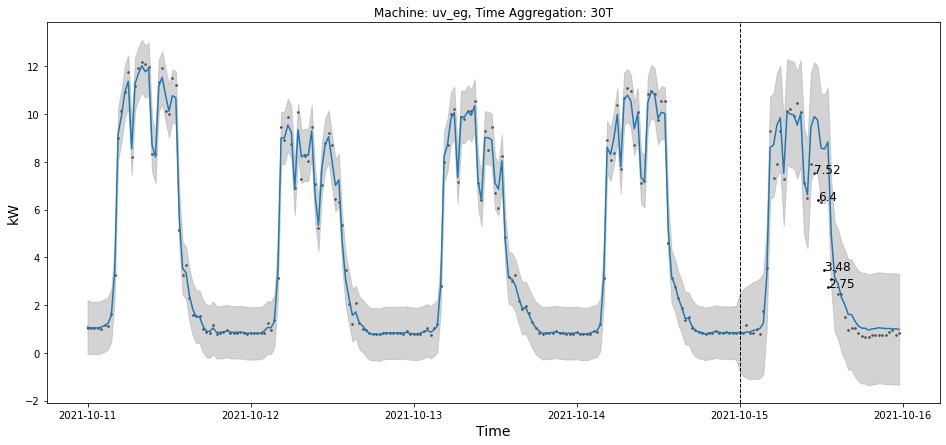

uv_eg
-----------------------------------
Expected next day energy consumption    =  103.23794865527069 kWh
Upper bound next day energy consumption =  156.47966950813813 kWh
Lower bound next day energy consumption =  49.99622780240323 kWh


Abnormal High Energy Consumption
---------------------------------


Abnormal Low Energy Consumption
---------------------------------
2021-10-15 11:00:00 7.523589938331311
2021-10-15 11:30:00 6.40372249789319
2021-10-15 12:30:00 3.4772132502787234
2021-10-15 13:00:00 2.74755711239674


In [10]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    lr=0.1, 
    machine='uv_eg',
    update_score=False
)

In [ ]:
mse, mape

### 10 minutes agg..

In [4]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='uv_eg_10T', 
    freq=10,
    normalize_time=True
    )

In [5]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 0.9036587978545216 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8693586045430345 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8350030457869366 , Noise = 0.5982203483581543
Iter 4 , Loss = 0.7996628399379175 , Noise = 0.5543950796127319
Iter 5 , Loss = 0.763622506709897 , Noise = 0.5129867792129517
Iter 6 , Loss = 0.7288631345443783 , Noise = 0.4739496409893036
Iter 7 , Loss = 0.6968858152610775 , Noise = 0.4372366666793823
Iter 8 , Loss = 0.6650936269676 , Noise = 0.40280625224113464
Iter 9 , Loss = 0.6331668840517288 , Noise = 0.3706044852733612
Iter 10 , Loss = 0.6018567426777621 , Noise = 0.3405647575855255
Iter 11 , Loss = 0.5717813679631198 , Noise = 0.3126148283481598
Iter 12 , Loss = 0.5427600213224907 , Noise = 0.2866804003715515
Iter 13 , Loss = 0.5137422211422522 , Noise = 0.262684166431427
Iter 14 , Loss = 0.4840976523051034 , Noise = 0.2405403107404709
Iter 15 , Loss = 0.45393401097418934 , Noise = 0.22015368938446045
Iter 16 , Loss = 0.42377891311395527

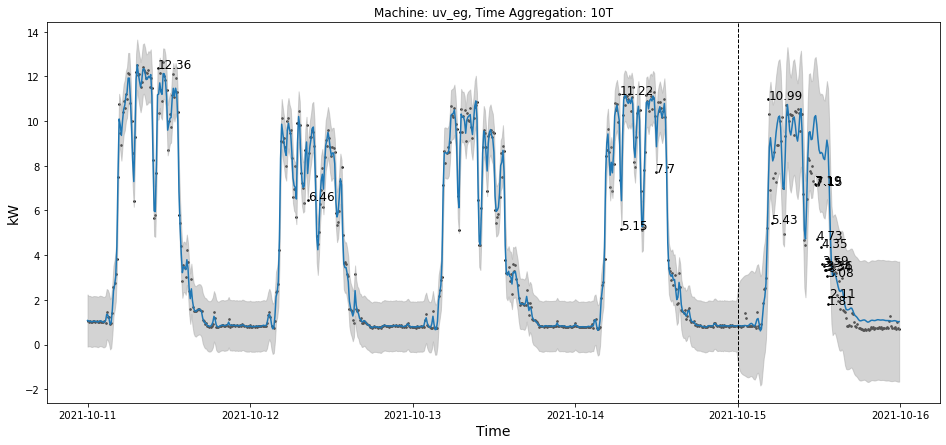

uv_eg
-----------------------------------
Expected next day energy consumption    =  308.8666109495108 kWh
Upper bound next day energy consumption =  493.81162347920053 kWh
Lower bound next day energy consumption =  123.9215984198211 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-11 10:20:00 12.35776286166504
2021-10-14 06:30:00 11.21761012642119
2021-10-15 04:30:00 10.994394311945358


Abnormal Low Energy Consumption
---------------------------------
2021-10-12 08:30:00 6.457709963823151
2021-10-14 06:50:00 5.151805383531305
2021-10-14 12:00:00 7.702682887591434
2021-10-15 05:00:00 5.432194851282061
2021-10-15 11:20:00 7.19289607600993
2021-10-15 11:30:00 7.145846339336488
2021-10-15 11:40:00 4.7328646200636415
2021-10-15 12:20:00 4.354277087810866
2021-10-15 12:30:00 3.5873542985460616
2021-10-15 12:40:00 3.5008917670312734
2021-10-15 12:50:00 3.343402951699988
2021-10-15 13:00:00 3.3552499434476775
2021-10-15 13:10:00 3.082940147370949
2021-10-15 13

In [6]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='10T',
    lr=0.1, 
    machine='uv_eg',
    update_score=False
)